
# Project: Medical Appointments No Show Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report is to analyze the data of Medical appointments no shows given the following variables:
- **PatientId,AppointmentID**
- **Gender**: Male or female
- **ScheduledDay**: the day of actual appointment
- **AppointmentDay**: the day someone called or registered
- **Age**: patient age
- **Neighbourhood**: where the appointment takes place?
- **Scholarship**: does the patient takes family allowance?
- **Hipertension, Diabetes,Alcoholism,Handcap**: Condition seriousness
- **SMS_received**: did the patient receive messages?
- **No-show**: did the patient show up in the scheduled day?

### Questions to Investigate
- What is Show / No Show distribution?
- What is the persentage of each gender in the dataset? 
- What is the distribution of age?
- Does gender have a correlation with no show? 
- Does age have a correlation with no show?
- Does the difference between the appointment day and scheduled day have a correlation with no show?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
nos_df = pd.read_csv('noshow.csv')
nos_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
nos_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
nos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the data info above we can see that there are no NaN value in the data but some column types needs to be corrected

In [6]:
nos_df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [7]:
nos_df.ScheduledDay.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

We may discard the times from both variables

In [8]:
nos_df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [9]:
nos_df.Gender.unique()

array(['F', 'M'], dtype=object)

In [10]:
sum(nos_df.Age==0)

3539

In [11]:
nos_df[nos_df.Age==0].sum()

PatientId                                               5.44662e+17
AppointmentID                                           20070995642
Gender            FMMMFMMFMMMMFMMFMFFMMFMFMFMFMFFFMMMFMMMFFMMFMF...
ScheduledDay      2016-04-29T08:08:43Z2016-04-27T10:46:12Z2016-0...
AppointmentDay    2016-04-29T00:00:00Z2016-04-29T00:00:00Z2016-0...
Age                                                               0
Neighbourhood     CONQUISTASÃO BENEDITOILHA DAS CAIEIRASCONQUIST...
Scholarship                                                      52
Hipertension                                                      0
Diabetes                                                          0
Alcoholism                                                        0
Handcap                                                           1
SMS_received                                                    897
No-show           NoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNo...
dtype: object

In [12]:
nos_df[nos_df.Age==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We should drop columns with age < 0, Age = 0 are mostly babies as they have no diabetes or hipertension or alchoholism

### Data Cleaning

#### Fixing Column Types

In [13]:
nos_df.AppointmentDay=pd.to_datetime(nos_df.AppointmentDay).dt.date.astype('datetime64[ns]')
nos_df.ScheduledDay=pd.to_datetime(nos_df.ScheduledDay).dt.date.astype('datetime64[ns]')


#### Dropping ID Columns

In [14]:
nos_df.drop(['PatientId','AppointmentID'],axis=1, inplace = True)

#### Cleaning Age Column (Removeing Age = -1)

In [15]:
nos_df=nos_df[nos_df.Age != -1]

#### Rename Columns

In [16]:
nos_df.rename(columns={'No-show':'NoShow','SMS_received':'SMSreceived'},inplace = True)

#### Creating Column for the difference between Appointment Day and Scheduled Day

In [17]:
nos_df['Sch-App']=nos_df.ScheduledDay-nos_df.AppointmentDay

In [18]:
nos_df['Sch-App']=nos_df['Sch-App'].dt.days

In [19]:
nos_df[nos_df['Sch-App']>0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,NoShow,Sch-App
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,1


It looks like the appointment day in all rows after the scheduled day which doesn't make sense, it must be vice versa
- so the scheduled day is the day when the patient called or registered

In [20]:
nos_df['app-sch']=nos_df.AppointmentDay-nos_df.ScheduledDay
nos_df['app-sch']=nos_df['app-sch'].dt.days
nos_df.drop(['Sch-App'],axis=1,inplace=True)

Now we should drop the rows where the difference is negative

In [21]:
nos_df=nos_df[nos_df['app-sch']>=0]

<a id='eda'></a>
## Exploratory Data Analysis

### Show / No Show Distribution

In [22]:
(nos_df.NoShow.value_counts()/nos_df.shape[0])

No     0.798102
Yes    0.201898
Name: NoShow, dtype: float64

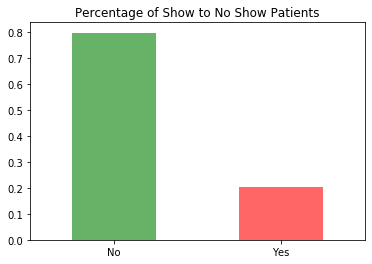

In [55]:
(nos_df.NoShow.value_counts()/nos_df.shape[0]).plot(alpha=0.6,kind='bar',color=['Green','Red'],rot=0)
plt.title("Percentage of Show to No Show Patients");


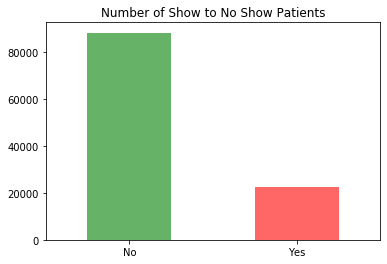

In [56]:
nos_df.NoShow.value_counts().plot(alpha=0.6, kind='bar',color=['Green','Red'],rot=0)
plt.title("Number of Show to No Show Patients");

20% of Patients dosn't show in scheduled time

### Gender Distribution

In [25]:
nos_df.Gender.value_counts()/nos_df.shape[0]

F    0.649976
M    0.350024
Name: Gender, dtype: float64

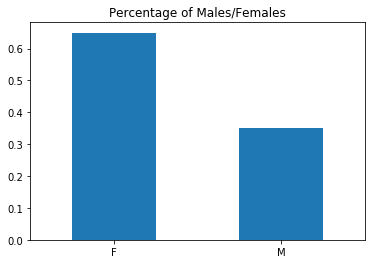

In [57]:
(nos_df.Gender.value_counts()/nos_df.shape[0]).plot(kind='bar',stacked=True,rot=0)
plt.title("Percentage of Males/Females");


The data shows that females are nearly double the count of males which indicates that females are care more about their personal health

### Age Distribution

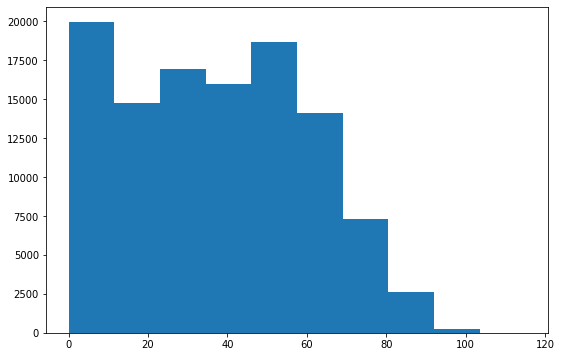

In [27]:
nos_df.Age.hist(figsize=(9,6))
plt.grid(False);

In [28]:
nos_df.describe()['Age']

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We can conclude that 75% of the patients are below 55 years old and the distribution of age is right skewed

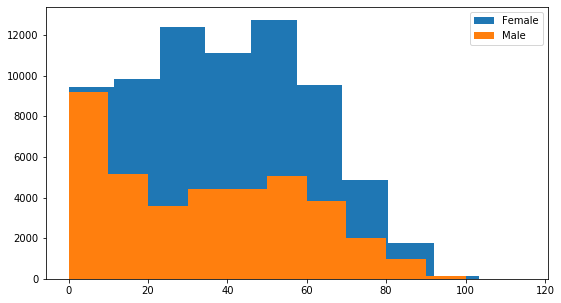

In [29]:
nos_df.Age[nos_df.Gender=='F'].hist(label='Female',figsize=(9,5))
nos_df.Age[nos_df.Gender=='M'].hist(label="Male",figsize=(9,5))
plt.legend()
plt.grid(False);

The percentage of young males is much more the percentage of young females as males distribution is more right skewed than females. The high percentage of young males might be because they are under the custody of their mothers

### Correlation Heat Map

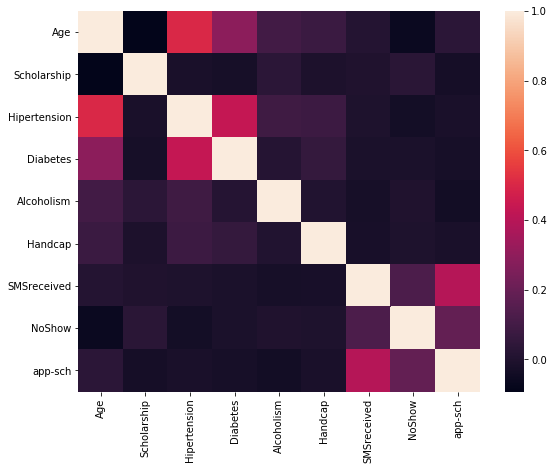

In [74]:
nos_df2=nos_df.copy(deep=True)
nos_df2.NoShow.replace(('Yes', 'No'), (1, 0),inplace= True)
plt.figure(figsize=(9,7))
sns.heatmap(nos_df2.corr());

The correlation heatmap helps to get some quick conclusions about the data some of them might not be investigated thoroughly in this analysis:
- No Show has correlation with app-sch (waiting time)
- SMS received has strong correlation with waiting time (probably they send reminders when the appointment is far from registeration time)
- There is a strong correlation between hypertension and Age also between hypertension and diabetes


### Correlation between Gender and No Show

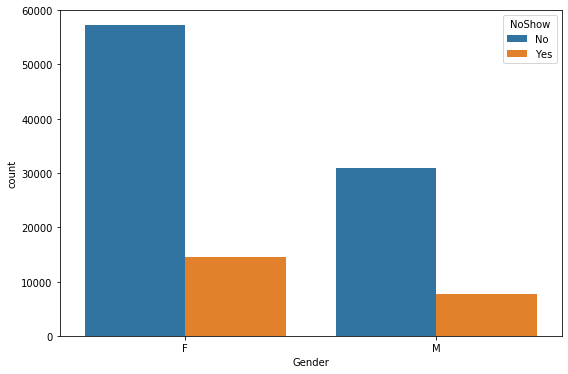

In [30]:
plt.figure(figsize=(9,6))
sns.countplot(x=nos_df.Gender, hue=nos_df.NoShow);

References: https://seaborn.pydata.org/generated/seaborn.countplot.html

It can be seen from the above graph that the percentage of show and no show is nearly the same between males and females which suggests that there is no correlation between the two variables

### Investigating correlation between age, gender and no show

In [31]:
nos_df['AgePins']=pd.cut(nos_df.Age,np.linspace(0,115,6))

Binning Age Column

Reference: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [32]:
age_df=pd.DataFrame(nos_df.groupby(['AgePins','NoShow'])['NoShow'].count()/nos_df.groupby(['AgePins'])['NoShow'].count())
age_df=age_df.loc[(slice(None),'Yes'),:]
age_df=age_df.droplevel(1)
age_df.reset_index(inplace=True)


Calculating the probability of no show for each age group

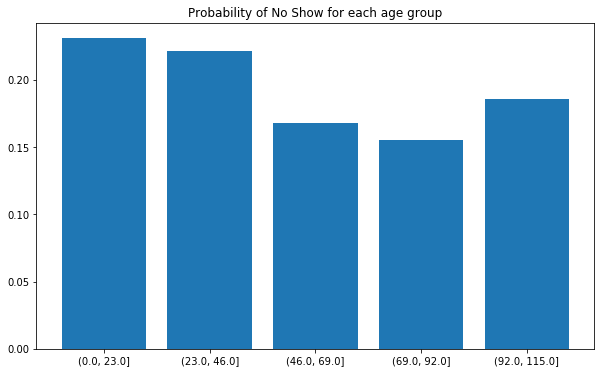

In [33]:
plt.figure(figsize=(10,6))
plt.bar(x=age_df.AgePins.astype(str),height=age_df.NoShow)
plt.title('Probability of No Show for each age group');

From the graph above it can be seen that people from 46 years to 92 years show lower probability of not showing up (15% compared to nearly 20% in other age groups), but let's include the gender in this distribution

In [34]:
agem_df=pd.DataFrame(nos_df[nos_df.Gender=="M"].groupby(['AgePins','NoShow'])['NoShow'].count()/nos_df[nos_df.Gender=="M"].groupby(['AgePins'])['NoShow'].count())
agem_df=agem_df.loc[(slice(None),'Yes'),:]
agem_df=agem_df.droplevel(1)
agem_df.reset_index(inplace=True)

In [35]:
agef_df=pd.DataFrame(nos_df[nos_df.Gender=="F"].groupby(['AgePins','NoShow'])['NoShow'].count()/nos_df[nos_df.Gender=="F"].groupby(['AgePins'])['NoShow'].count())
agef_df=agef_df.loc[(slice(None),'Yes'),:]
agef_df=agef_df.droplevel(1)
agef_df.reset_index(inplace=True)

Calculating the probability of no show for each age group per gender

''

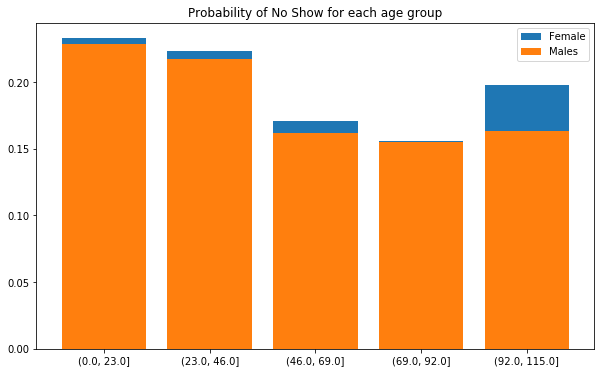

In [36]:
plt.figure(figsize=(10,6))

#plt.bar(x=age_df.AgePins.astype(str),height=age_df.NoShow)
plt.bar(x=agef_df.AgePins.astype(str),height=agef_df.NoShow,label='Female')
plt.bar(x=agem_df.AgePins.astype(str),height=agem_df.NoShow,label='Males')
plt.legend()
plt.title('Probability of No Show for each age group')
;

It can be concluded from the above chart that older males tend to show in scheduled time more than old females

### Correlation between Waiting Time and No Show

In [37]:
plot_s=pd.DataFrame(nos_df.groupby(['app-sch','NoShow'])['NoShow'].count()/nos_df.groupby(['app-sch'])['NoShow'].count())
plot_s=plot_s.loc[(slice(None),'Yes'),:]
plot_s=plot_s.droplevel(1)
plot_s.reset_index(inplace=True)

Creating Data Frame for percentage of No shows in each number of difference days

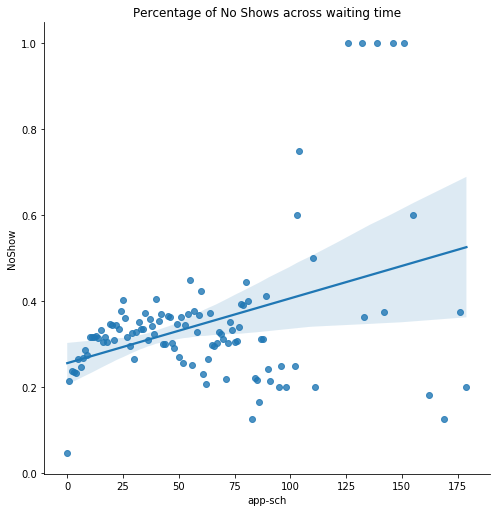

In [38]:
sns.lmplot(x='app-sch',y='NoShow',data=plot_s,fit_reg=True,height=7)
plt.title("Percentage of No Shows across waiting time");

I looks like the larger the distance, the higher the probability of no show but we should investigate first the number of patients in theses values before reaching a final conclusion

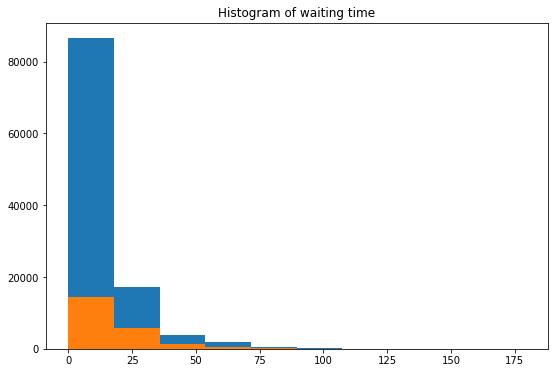

In [39]:
nos_df['app-sch'].hist(figsize=(9,6))
nos_df['app-sch'][nos_df.NoShow=='Yes'].hist(figsize=(9,6))
plt.title('Histogram of waiting time')
plt.grid(False);

From the distribution of the days it is clear that the number of patients is very low in the higher difference in days so we the probability that this correlation holds consistently is low

<a id='conclusions'></a>
## Conclusions

After cleaning and investigating the dataset I conclude the following: 
- Around 20% of patients don't show up in scheduled time
- Females care more about their peronal health
- Males younger than 10 years old go to doctors much more than other males (probably because they are still under the custodiy of female mothers)
- Gender alone doesn't have a significant correlation with no show, However Gender with age has some correlation. As Old males are less probable to no show than old females
- People from 46 years to 92 years show lower probability of not showing up (15% compared to nearly 20% in other age groups)
- The higher the number of waiting days (difference between appointment and scheduled day, the higher the probability of not showing up but this correlation is not very accurate as the number of patients with waiting days larger than 100 is relatively low

### Analysis Limitations
- If there is a column to indicate the distance between the place where the patient lives and the place of the appointment that would help in investigating this correlation
- There is no column to state if the patient himself who registered for the appointment or someone did for him
- The analysis doesn't investigate the relationship between different health problems and No Show or the relationship between different problems
- The analysis shows good insights about data but it lacks the testing of the significance for all results. For instance, calculating the R squared of the regression line between the waiting time and probability of No Show

### Further Investigation Recommendations
- The relationship between No Show and neigborhood and scholarship should be investigated
- The relationship between No Show and patients condition should be investigated
- A machine learning model could be used to predict the show and no show, but in this case the waiting time should be added as an input